# start

In [2]:
PRFX = 'MelEDA0702A2'
PRFX_PREP = 'MelPrp0630C1'

# setup

In [3]:
import albumentations as A


In [4]:
from pathlib import Path
import pickle
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
from PIL import Image
import cv2


In [5]:
import albumentations as A

# augs

In [77]:
dir(A)

['BasicIAATransform',
 'BasicTransform',
 'BboxParams',
 'BboxProcessor',
 'Blur',
 'CLAHE',
 'CenterCrop',
 'ChannelDropout',
 'ChannelShuffle',
 'CoarseDropout',
 'Compose',
 'Crop',
 'CropNonEmptyMaskIfExists',
 'Cutout',
 'Downscale',
 'DualIAATransform',
 'DualTransform',
 'ElasticTransform',
 'Equalize',
 'FancyPCA',
 'Flip',
 'FromFloat',
 'GaussNoise',
 'GaussianBlur',
 'GlassBlur',
 'GridDistortion',
 'GridDropout',
 'HorizontalFlip',
 'HueSaturationValue',
 'IAAAdditiveGaussianNoise',
 'IAAAffine',
 'IAACropAndPad',
 'IAAEmboss',
 'IAAFliplr',
 'IAAFlipud',
 'IAAPerspective',
 'IAAPiecewiseAffine',
 'IAASharpen',
 'IAASuperpixels',
 'ISONoise',
 'ImageCompression',
 'ImageOnlyIAATransform',
 'ImageOnlyTransform',
 'InvertImg',
 'JpegCompression',
 'KeypointParams',
 'Lambda',
 'LongestMaxSize',
 'MaskDropout',
 'MedianBlur',
 'MotionBlur',
 'MultiplicativeNoise',
 'NoOp',
 'Normalize',
 'OneOf',
 'OneOrOther',
 'OpticalDistortion',
 'PadIfNeeded',
 'Posterize',
 'RGBShift',
 

In [14]:
def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.imshow(image)

In [7]:
p_cmp = '../input/siim-isic-melanoma-classification/'
p_prp = f'../output/{PRFX_PREP}'
dftrn = pd.read_csv(f'{p_prp}/train_all.csv') 
dftst = pd.read_csv(f'{p_prp}/test.csv')

../output/MelPrp0630C1/siim-isic-melanoma-classification/jpeg/train/ISIC_8202626.jpg


(548, 336)

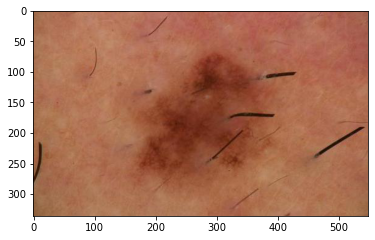

In [21]:
fnm = np.random.choice(dftrn.im_pth)
print(fnm)
x = Image.open(fnm)
plt.imshow(x);
x.size

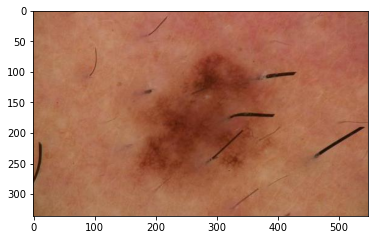

In [22]:
x = cv2.imread(fnm)
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
plt.imshow(x);

In [16]:
image = cv2.imread(fnm)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

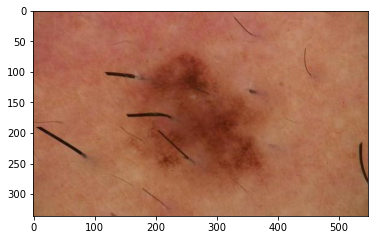

In [24]:
aug = A.HorizontalFlip(p=1)
augment_and_show(aug, x)

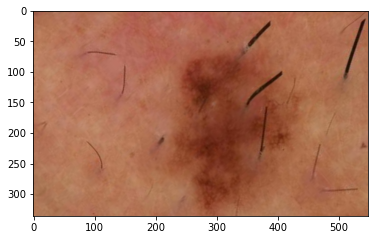

In [39]:
aug = A.ShiftScaleRotate(p=1)
augment_and_show(aug, x)

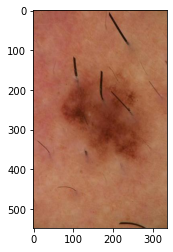

In [62]:
aug = A.RandomRotate90()
augment_and_show(aug, x)

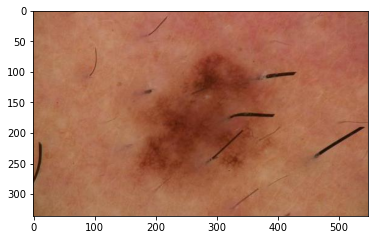

In [67]:
aug = A.HorizontalFlip()
augment_and_show(aug, x)

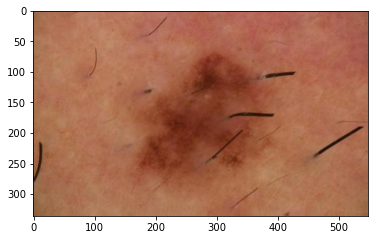

In [76]:
aug = A.OpticalDistortion()
augment_and_show(aug, x)

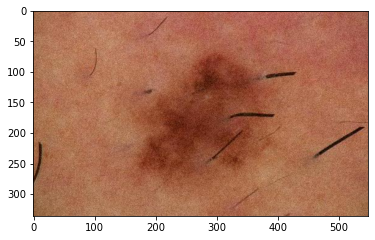

In [82]:
aug = A.IAAAdditiveGaussianNoise()
augment_and_show(aug, x)

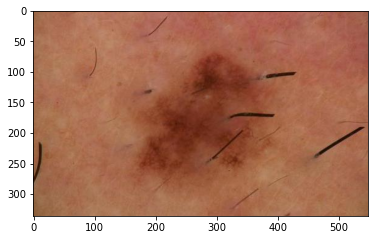

In [85]:
aug = A.RandomContrast()
augment_and_show(aug, x)

# compose